In [1]:
import numpy as np
import pandas as pd

import pyaf.ForecastEngine as autof


In [2]:
# remove the notebook root logger.\n",
import logging
logger = logging.getLogger()
logger.handlers = []

In [3]:
uri = "http://raw.githubusercontent.com/antoinecarme/TimeSeriesData/master/YahooFinance/nasdaq/yahoo_AAPL.csv"

In [4]:
df = pd.read_csv(uri)

In [5]:
df.head()

,Unnamed: 0,Symbol,Adj_Close,High,Low,Volume,Open,Date,Close
0,0,AAPL,102.949997,104.349998,102.750000,90898300,104.269997,2016-07-27,102.949997
1,1,AAPL,96.669998,97.970001,96.419998,42342400,96.820000,2016-07-26,96.669998
2,2,AAPL,97.339996,98.839996,96.919998,40144400,98.250000,2016-07-25,97.339996
3,3,AAPL,98.660004,99.300003,98.309998,28177200,99.260002,2016-07-22,98.660004
4,4,AAPL,99.430000,101.000000,99.129997,31792000,99.830002,2016-07-21,99.430000


In [11]:
df.Date = df.Date.values.astype('datetime64[D]')
df = df.sort_values(by = 'Date' , ascending=True)
df.Date.dtype


dtype('<M8[ns]')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1258 entries, 1257 to 0
Data columns (total 9 columns):
Unnamed: 0    1258 non-null int64
Symbol        1258 non-null object
Adj_Close     1258 non-null float64
High          1258 non-null float64
Low           1258 non-null float64
Volume        1258 non-null int64
Open          1258 non-null float64
Date          1258 non-null datetime64[ns]
Close         1258 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(2), object(1)
memory usage: 98.3+ KB


In [13]:
print(df.head())

      Unnamed: 0 Symbol  Adj_Close        High         Low     Volume  \
1257        1257   AAPL  51.523488  396.989994  388.130005  148508500   
1256        1256   AAPL  51.347280  395.150005  384.000004  158146100   
1255        1255   AAPL  52.171771  399.500011  392.369995  153209000   
1254        1254   AAPL  51.140829  397.900002  388.350010  159884900   
1253        1253   AAPL  51.622111  393.549995  382.239990  183127000   

            Open       Date       Close  
1257  391.619991 2011-07-28  391.819996  
1256  387.640007 2011-07-29  390.479992  
1255  397.779999 2011-08-01  396.749989  
1254  397.650009 2011-08-02  388.909996  
1253  390.980003 2011-08-03  392.570000  


In [14]:
lEngine = autof.cForecastEngine()
# lEngine
lEngine.train(df , 'Date' , 'Close', 7);
lEngine.getModelInfo();

INFO:pyaf.std:START_TRAINING 'Close'
INFO:pyaf.std:END_TRAINING_TIME_IN_SECONDS 'Close' 8.823948860168457
INFO:pyaf.std:TIME_DETAIL TimeVariable='Date' TimeMin=2011-07-28T00:00:00.000000 TimeMax=2015-07-20T00:00:00.000000 TimeDelta=1 days Estimation = (0 , 1000) Validation = (1000 , 1251) Test = (1251 , 1258) Horizon=7
INFO:pyaf.std:SIGNAL_DETAIL SignalVariable='_Close' Min=90.279999 Max=702.100021  Mean=337.341653264 StdDev=207.088143863
INFO:pyaf.std:BEST_TRANSOFORMATION_TYPE '_'
INFO:pyaf.std:BEST_DECOMPOSITION  '_Close_Lag1Trend_residue_zeroCycle_residue_NoAR' [Lag1Trend + NoCycle + NoAR]
INFO:pyaf.std:TREND_DETAIL '_Close_Lag1Trend' [Lag1Trend]
INFO:pyaf.std:CYCLE_DETAIL '_Close_Lag1Trend_residue_zeroCycle' [NoCycle]
INFO:pyaf.std:AUTOREG_DETAIL '_Close_Lag1Trend_residue_zeroCycle_residue_NoAR' [NoAR]
INFO:pyaf.std:MODEL_MAPE MAPE_Fit=0.018 MAPE_Forecast=0.0129 MAPE_Test=0.0137
INFO:pyaf.std:MODEL_MASE MASE_Fit=0.999 MASE_Forecast=0.9998 MASE_Test=0.8607
INFO:pyaf.std:MODEL_L1 L1_

In [16]:
dfapp_out = lEngine.forecast(df, 7);
#dfapp_out.to_csv("outputs/ozone_apply_out.csv")
dfapp_out.tail(2 * 7)
print("Forecast Columns " , dfapp_out.columns);
Forecast_DF = dfapp_out[['Date' , 'Close', 'Close' + '_Forecast']]
Forecast_DF.info()
print("Forecasts\n" , Forecast_DF.tail(14));


Forecast Columns  Index(['Close', 'Date', '_Close', 'row_number', 'Date_Normalized',
       '_Close_Lag1Trend', '_Close_Lag1Trend_residue',
       '_Close_Lag1Trend_residue_zeroCycle',
       '_Close_Lag1Trend_residue_zeroCycle_residue',
       '_Close_Lag1Trend_residue_zeroCycle_residue_NoAR',
       '_Close_Lag1Trend_residue_zeroCycle_residue_NoAR_residue',
       '_Close_Trend', '_Close_Trend_residue', '_Close_Cycle',
       '_Close_Cycle_residue', '_Close_AR', '_Close_AR_residue',
       '_Close_TransformedForecast', '_Close_TransformedResidue',
       'Close_Forecast', 'Close_Residue', 'Close_Forecast_Lower_Bound',
       'Close_Forecast_Upper_Bound'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1265 entries, 0 to 1264
Data columns (total 3 columns):
Date              1265 non-null datetime64[ns]
Close             1258 non-null float64
Close_Forecast    1265 non-null float64
dtypes: datetime64[ns](1), float64(2)
memory usage: 29.7 KB
Forecasts
         

/usr/lib/python3/dist-packages/matplotlib/__init__.py:1403: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


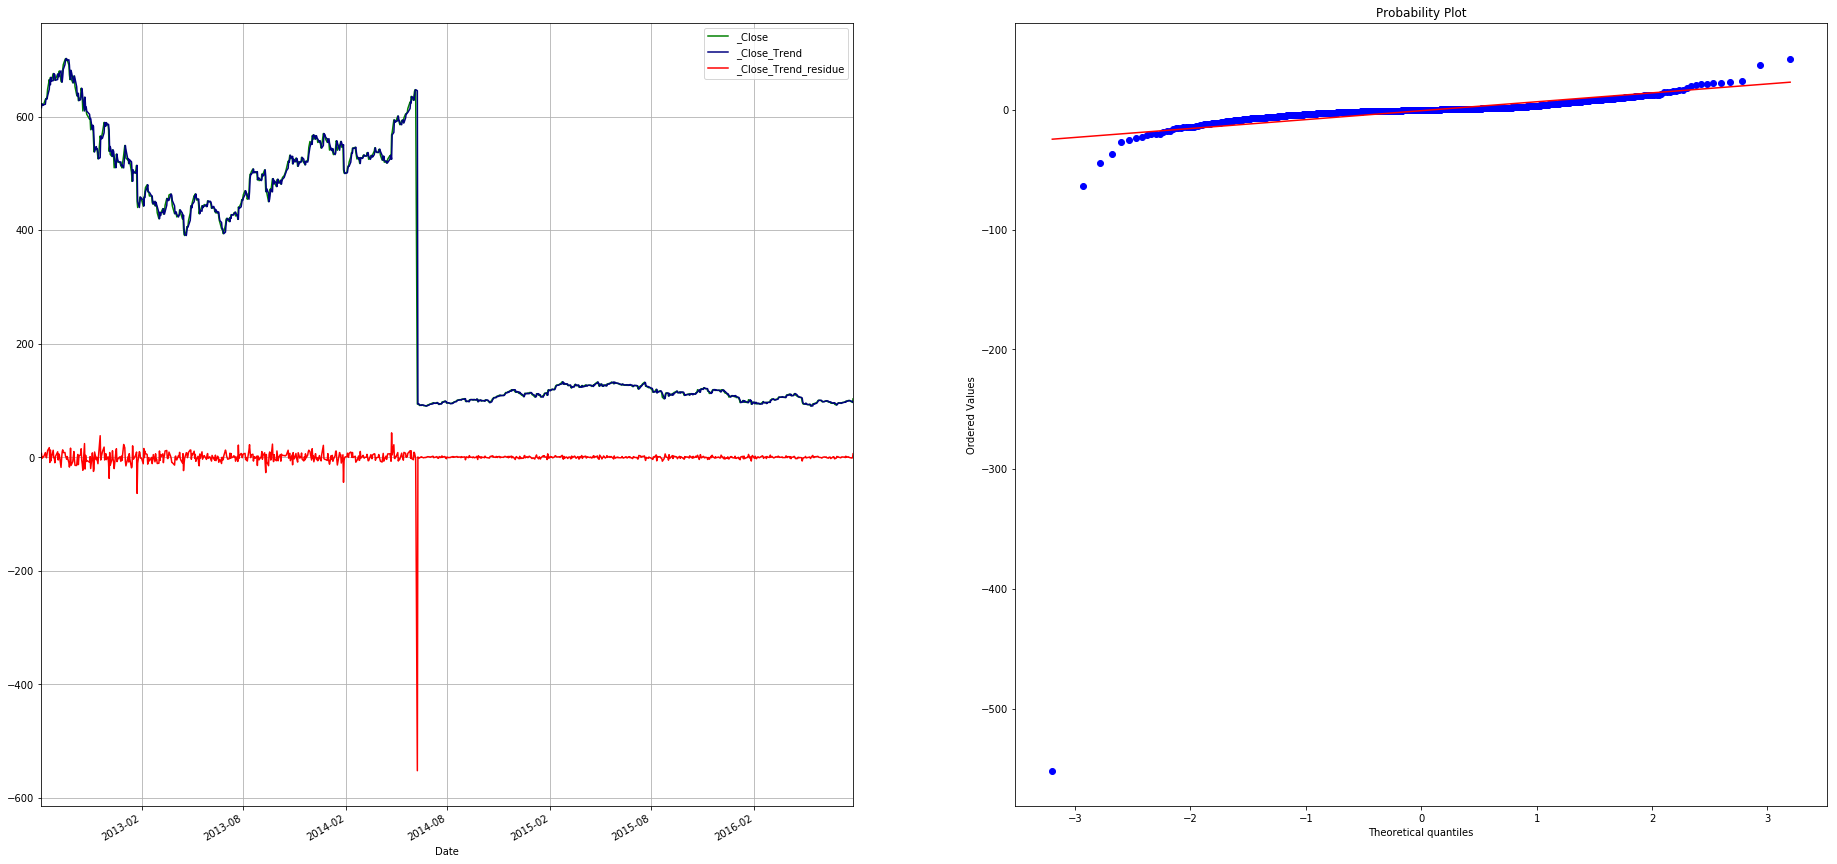

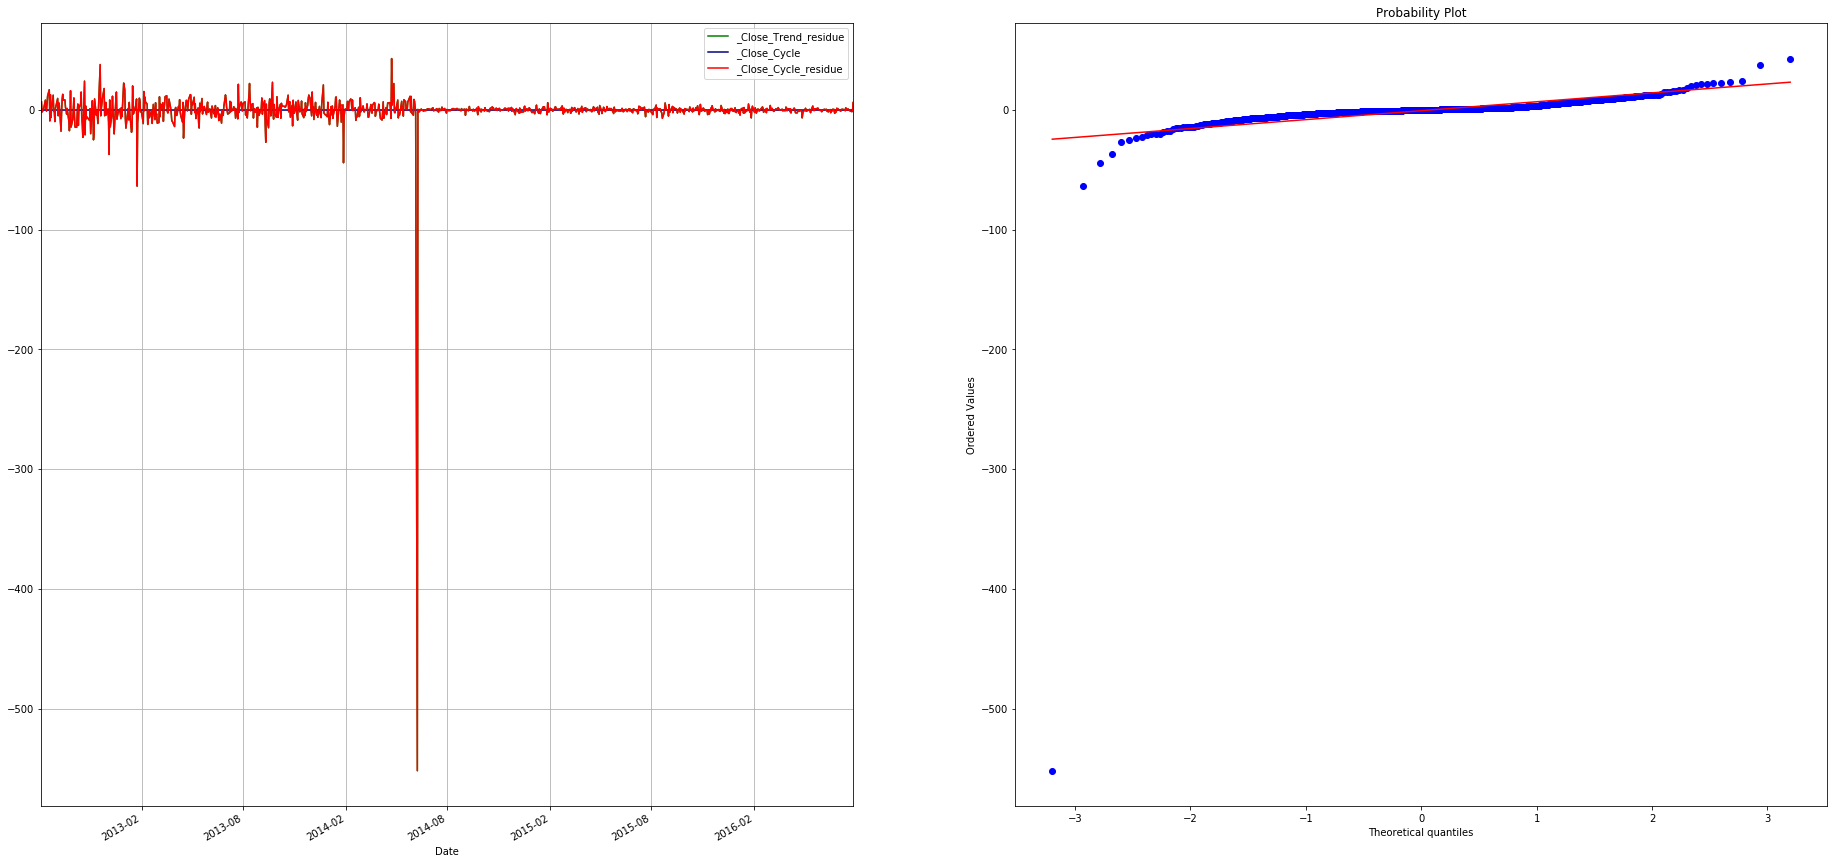

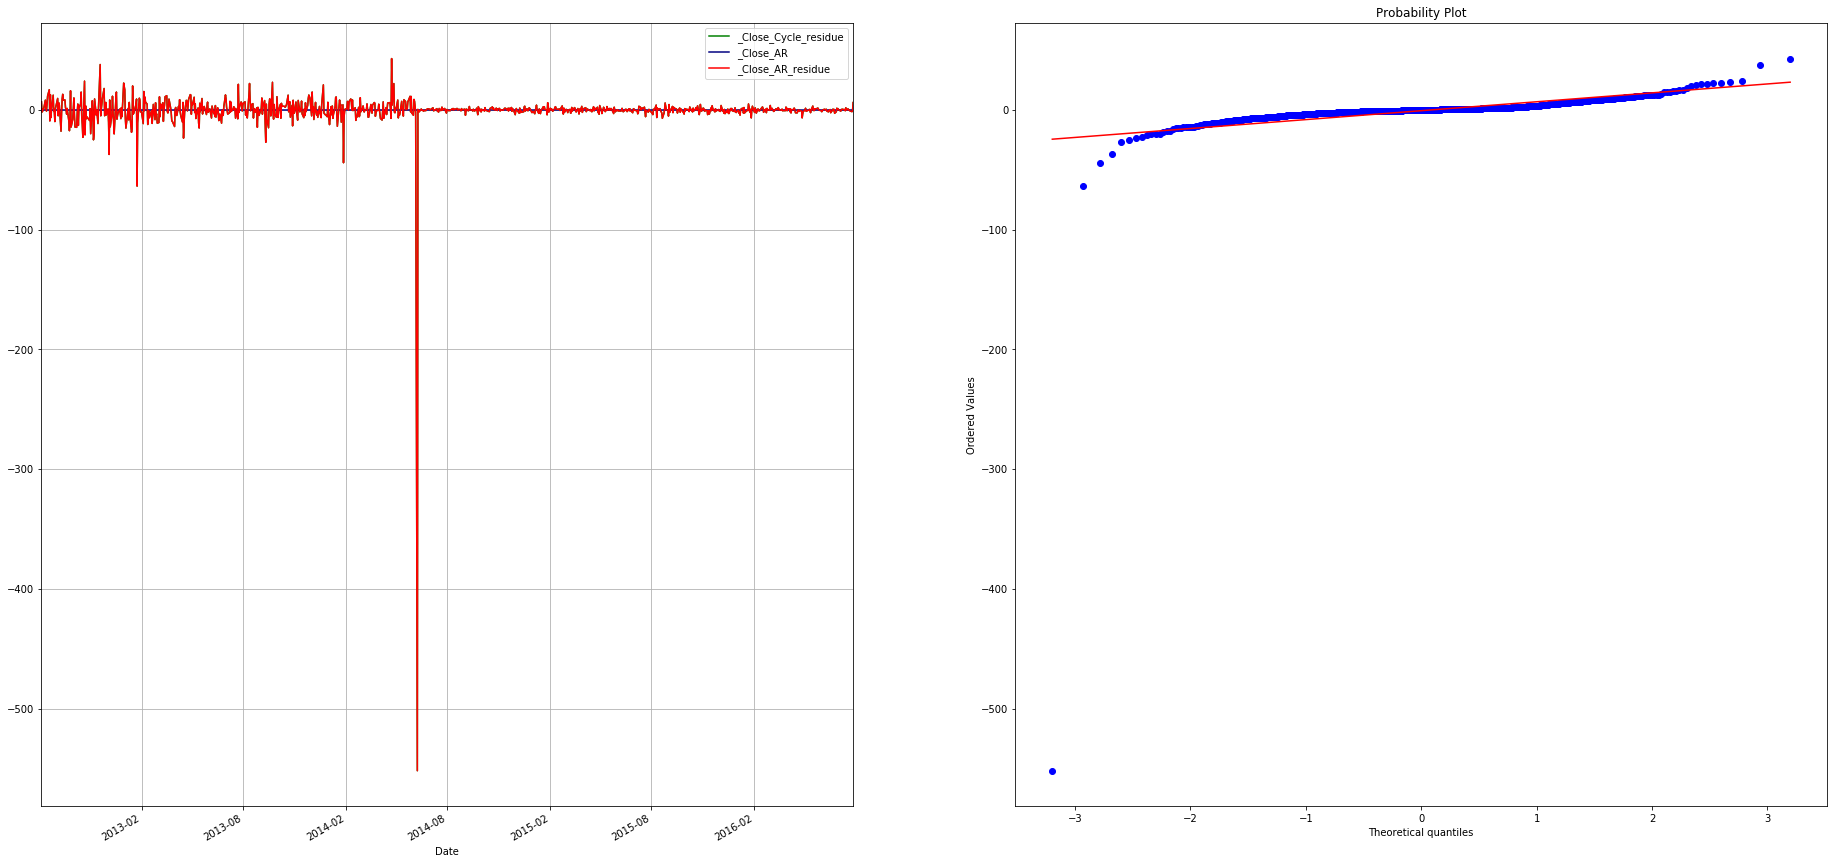

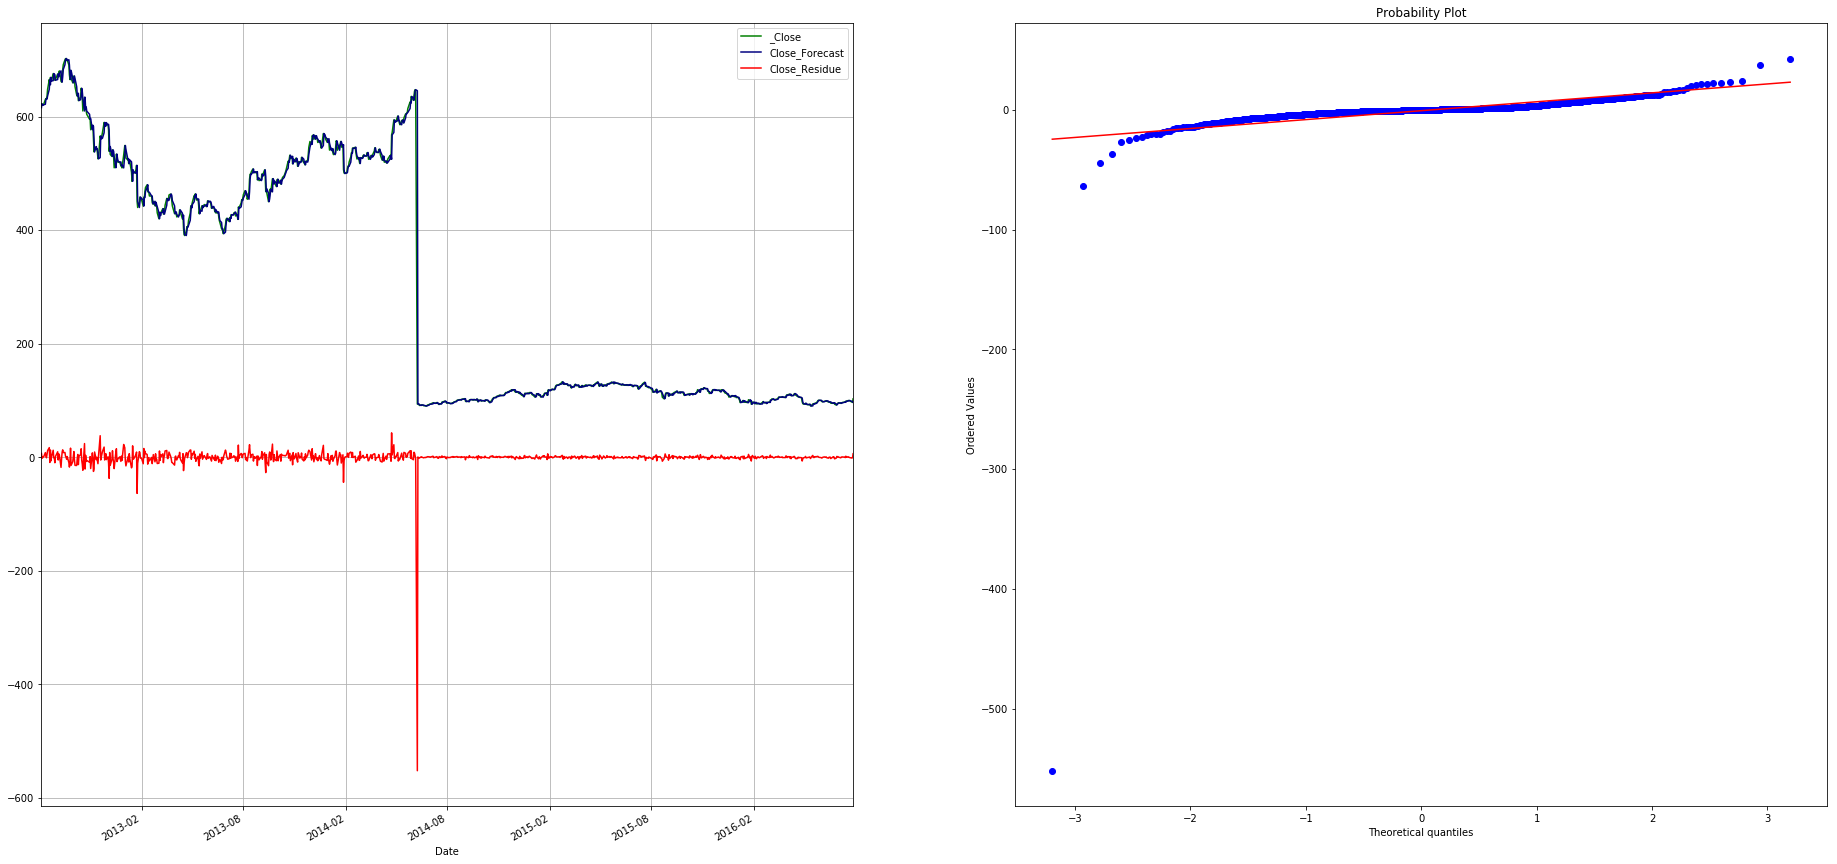

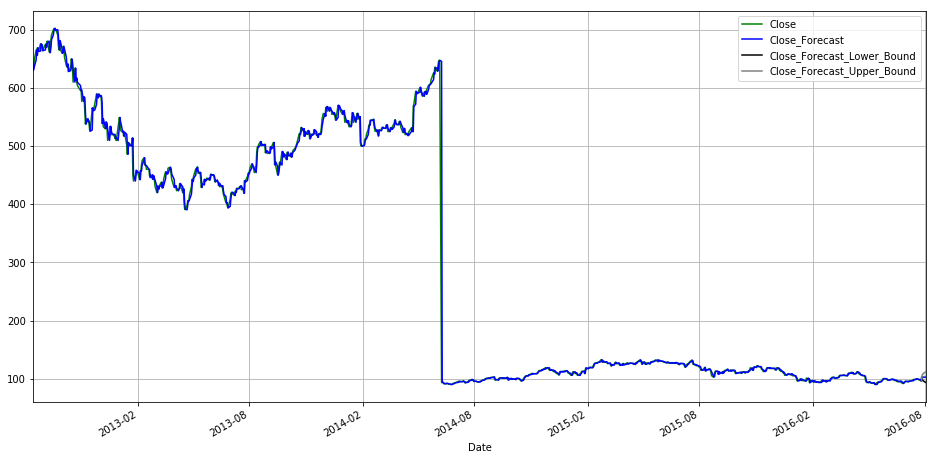

In [15]:
%matplotlib inline
lEngine.standrdPlots()
